# Audio Processing

In this livecode we will both generate sound waves & analyze `.wav` files on the hard drive.

The goal is to understand how a sound is encoded in numbers, the same way images or videos are, as well as basically anything a computer manipulates.

In [101]:
!pip install scipy --quiet

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy.io import wavfile
from IPython.display import Audio

## Sound Synthesis

Before we generate sound from scratch, let's see how the computer records sound from a microphone:

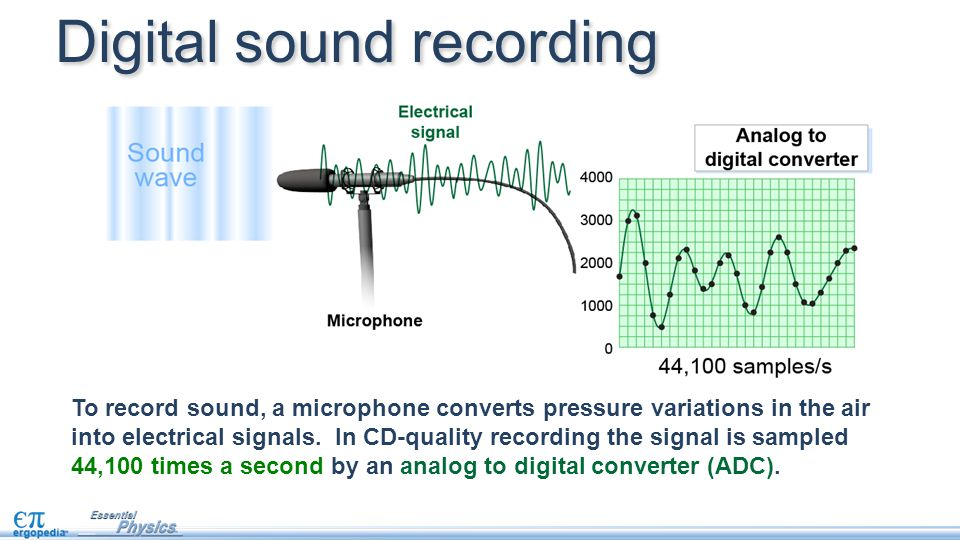

In [103]:
R = 44100 # Sampling rate
D = 1     # Duration of the sound

❓ Write a `note(f)` function which takes a frequency $f$ (in Hz) and generate a sinusoide signal with sampling rate `R` and duration `D` (constants).

<details>
    <summary>💡 <strong>Hint</strong> </summary>
    
A single-frequency sound wave with frequency $f$ and maximum amplitude $A$ is represented by the sine function:

$$y(t)=A \times sin(2 \pi f t)$$

where $t$ is time and $y(t)$ is the amplitude of the sound wave at time $t$.

You can consider for now that the maximum amplitude $A$ is `1`.

Remember, you can generate a big list of numbers using [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
</details>

In [104]:
def note(f):
    x = np.linspace(0, D, D * R)
    y = np.cos( 2 * np.pi * f * x)
    return y

❓ Plot the output of `note(f)` for `440 Hz`. For `1Hz`. What do you see?

0.0022727272727272726

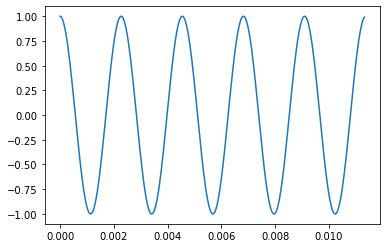

In [105]:
x = np.linspace(0, D, D * R)
la = note(440)
plt.plot(x[0:500], la[0:500])
period = 1/440
period

❓ Call the `note` function to generate an `A` (440 Hz) from the diapason. Play it.

<details>
    <summary>💡 <strong>Hint</strong></summary>

Use [`Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) from `IPython.display` already imported in the notebook at the first cell)
</details>

In [106]:
Audio(la,rate=R)

❓ Try and layer several notes, like `A` + the perfect fifth, major (or minor) third, etc into a `chord` variable. Play it!

<details>
    <summary>💡 <strong>Hint</strong></summary>
    
Check out the [Frequency Ratio](https://en.wikipedia.org/wiki/Interval_(music)#Frequency_ratios) on Wikipedia. For instance, the perfect fifth has a $\frac{3}{2}$ ratio
</details>

In [107]:
fifth = note(440 * 3/2)
third = note(440 * 5/4)
chord = 1 * la + 0.5 * fifth + 0.25 * third
Audio(chord,rate=R)

❓ Plot the first `1000` samples of the chord

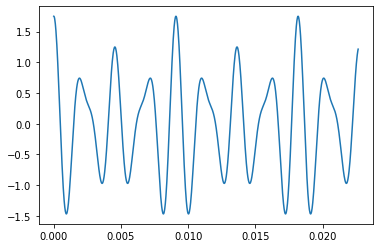

In [108]:
plt.plot(x[0:1000], chord[0:1000])

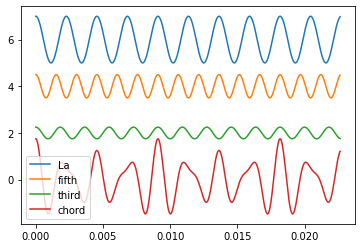

In [109]:
plt.plot(x[0:1000], la[0:1000] + 6, label="La")
plt.plot(x[0:1000], 0.5 *fifth[0:1000] + 4, label="fifth")
plt.plot(x[0:1000], 0.25 * third[0:1000] + 2, label="third")
plt.plot(x[0:1000], chord[0:1000], label="chord")
plt.legend()

## [Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

> Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 
> **Wikipedia**

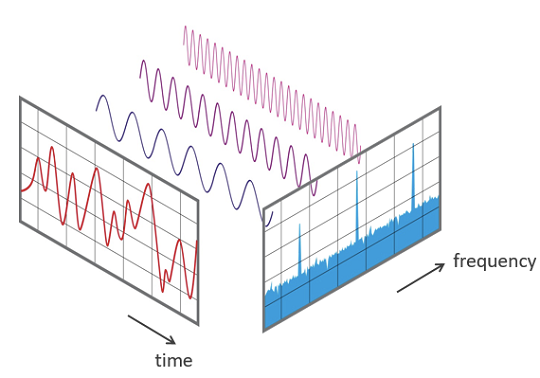

Let's use [`scipy.fft`](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html) to analyze the signals we built above.

Run the following code. Change the `chord` above, and replot it. What do you see?

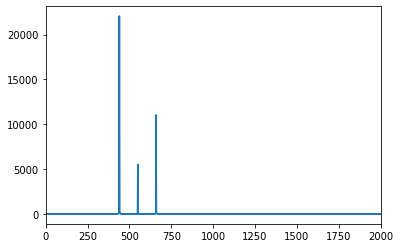

In [110]:
def plot_fft(signal, rate, freq_max):
    Y = np.abs(fft.fft(signal))
    X = np.abs(fft.fftfreq(Y.size) * rate)
    plt.xlim(0, freq_max)
    plt.plot(X, Y)
    
plot_fft(chord, R, 2000)

## Real-life samples

Let's perform `fft` on the `.wav` files in the folder:

In [111]:
!ls -lh *.wav

-rw-r--r--  1 jonathan  staff   505K May  9 22:10 bird.wav
-rw-r--r--  1 jonathan  staff   379K May  9 22:10 blissful_bell.wav
-rw-r--r--  1 jonathan  staff   400K May  9 22:10 guitar_G.wav
-rw-r--r--  1 jonathan  staff   265K May  9 22:10 piano_F.wav
-rw-r--r--  1 jonathan  staff   100K May  9 22:10 snare_80s.wav


Let's load the audio of `bird.wav` and visualize the sound **waveform**

In [112]:
rate, audio = wavfile.read("bird.wav")
audio.T[0][R:(R+10)]

array([-396, -616, -699, -663, -531, -339, -138,   25,  126,  166],
      dtype=int16)

## Bird

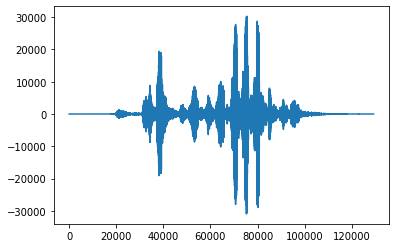

In [113]:
rate, audio = wavfile.read("bird.wav")
plt.plot(audio.T[0])

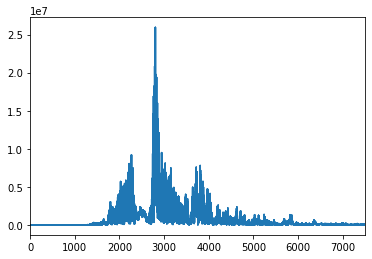

In [114]:
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)

## Blissful bell

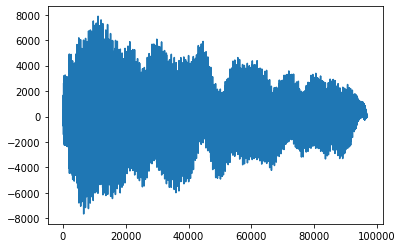

In [115]:
rate, audio = wavfile.read("blissful_bell.wav")
plt.plot(audio.T[0])

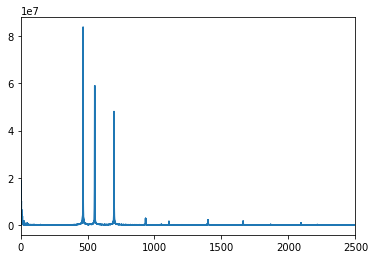

In [116]:
plot_fft(audio.T[0], rate, 2500)
Audio(audio.T[0], rate=rate)

## Guitar

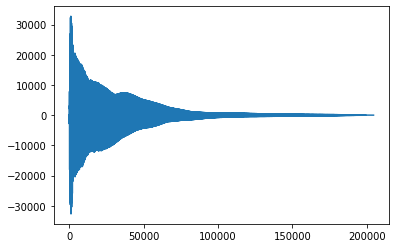

In [117]:
rate, audio = wavfile.read("guitar_G.wav")
plt.plot(audio.T)

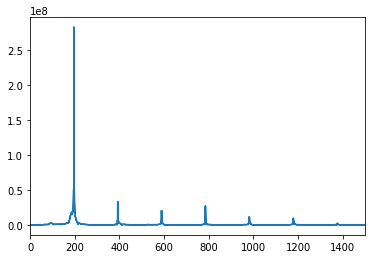

In [118]:
plot_fft(audio.T, rate, 1500)
Audio(audio.T, rate=rate)

## Piano

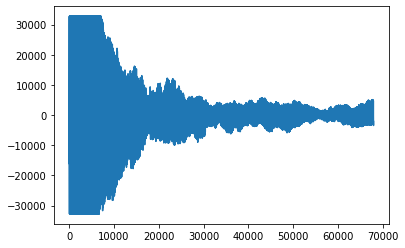

In [119]:
rate, audio = wavfile.read("piano_F.wav")
plt.plot(audio.T[0])

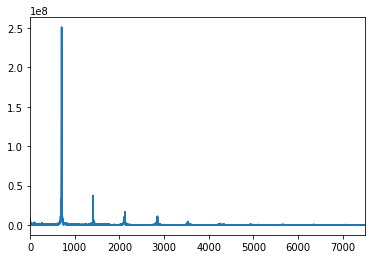

In [120]:
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)

## Snare

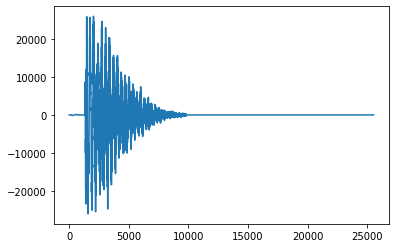

In [121]:
rate, audio = wavfile.read("snare_80s.wav")
plt.plot(audio.T[0])

Now let's apply and plot the FFT of that signal & play it

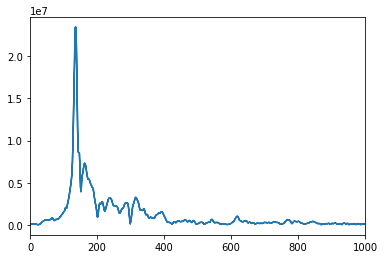

In [127]:
plot_fft(audio.T[0], rate, 1000)
Audio(audio.T[0], rate=rate)

---

Awesome! 


# La lettre à Elise

### Références 
- [Notes de la lettre à Elise](http://pasperdus.canalblog.com/archives/2006/11/11/3947884.html#:~:text=MI%20RE%20MI%20RE%20MI,SOL%20FA%20MI%20RE%20...&text=L'oeuvre%20fut%20compos%C3%A9e%2C%20selon,Albumbl%C3%A4tter%20comportant%20d'autres%20pi%C3%A8ces.&text=Leurs%20sentiments%20semblent%20passionn%C3%A9s%20en%201810.)
- [Correspondance entre les notes et les fréquences](https://fr.wikipedia.org/wiki/Note_de_musique)

In [131]:
elise_notes = [
  "MI", "RE", "MI", "RE",
  "MI", "SI", "RE", "DO",
  "LA", "DO", "MI", "LA",
  "SI", "MI", "SOL", "SI",
  "DO", "MI", "MI", "RE",
  "MI", "RE", "MI", "SI",
  "RE", "DO", "LA", "DO",
  "MI", "LA", "SI", "MI",
  "DO", "SI", "LA", "LA",
  "SI", "DO", "RE", "MI",
  "SOL", "FA", "MI", "RE"]

frequencies = {
  "DO": 261.63,
  "RE": 293.66,
  "MI": 329.63,
  "FA": 349.23,
  "SOL": 392.00,
  "LA": 440.00,
  "SI": 493.88}

In [137]:
R = 44100
D = 1
def song(f):
    x = np.linspace(0, D, D * R)
    y = np.cos( 2 * np.pi * f * x)
    return y

### Pseudo code
- Initialiser un la liste songs
- Itérerer sur elise_notes
- Pour chaque note reconstruire le song
- Ajouter ce song ma la liste songs
- Jouer la liste songs

In [141]:
songs = np.array([])
for note in elise_notes:
    new_song = song(frequencies[note])
    songs = np.concatenate((songs, new_song), axis=None)
Audio(songs, rate=rate)